In [88]:
import pandas as pd
import numpy as np
df = pd.read_excel("Данные_для_курсовои_Классическое_МО.xlsx")
df.head()

Unnamed: 0    IC50, mM    CC50, mM         SI  MaxAbsEStateIndex  \
0           0    6.239374  175.482382  28.125000           5.094096   
1           1    0.771831    5.402819   7.000000           3.961417   
2           2  223.808778  161.142320   0.720000           2.627117   
3           3    1.705624  107.855654  63.235294           5.097360   
4           4  107.131532  139.270991   1.300000           5.150510   

   MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex       qed        SPS  \
0        5.094096           0.387225        0.387225  0.417362  42.928571   
1        3.961417           0.533868        0.533868  0.462473  45.214286   
2        2.627117           0.543231        0.543231  0.260923  42.187500   
3        5.097360           0.390603        0.390603  0.377846  41.862069   
4        5.150510           0.270476        0.270476  0.429038  36.514286   

   ...  fr_sulfide  fr_sulfonamd  fr_sulfone  fr_term_acetylene  fr_tetrazole  \
0  ...           0             0           0                  0             0   
1  ...           0             0           0                  0             0   
2  ...           0             0           0                  0             0   
3  ...           0             0           0                  0             0   
4  ...           0             0           0                  0             0   

   fr_thiazole  fr_thiocyan  fr_thiophene  fr_unbrch_alkane  fr_urea  
0            0            0             0                 3        0  
1            0            0             0                 3        0  
2            0            0             0                 3        0  
3            0            0             0                 4        0  
4            0            0             0                 0        0  

[5 rows x 214 columns]

In [89]:
df = df.drop('Unnamed: 0', axis=1)

In [90]:
print("Размерность данных:", df.shape)

Размерность данных: (1001, 213)


In [91]:
df.dtypes

IC50, mM             float64
CC50, mM             float64
SI                   float64
MaxAbsEStateIndex    float64
MaxEStateIndex       float64
                      ...   
fr_thiazole            int64
fr_thiocyan            int64
fr_thiophene           int64
fr_unbrch_alkane       int64
fr_urea                int64
Length: 213, dtype: object

In [92]:
# Пропущенные значения
missing = df.isnull().sum().sort_values(ascending=False)
print("\nПропущенные значения:")
print(missing[missing > 0])


Пропущенные значения:
BCUT2D_MRHI            3
BCUT2D_MWHI            3
BCUT2D_CHGHI           3
MinAbsPartialCharge    3
MaxAbsPartialCharge    3
MinPartialCharge       3
MaxPartialCharge       3
BCUT2D_CHGLO           3
BCUT2D_LOGPHI          3
BCUT2D_LOGPLOW         3
BCUT2D_MWLOW           3
BCUT2D_MRLOW           3
dtype: int64


In [93]:
# Основные числовые характеристики
print("\nСтатистика по числовым признакам:")
print(df.describe())


Статистика по числовым признакам:
          IC50, mM     CC50, mM            SI  MaxAbsEStateIndex  \
count  1001.000000  1001.000000   1001.000000        1001.000000   
mean    222.805156   589.110728     72.508823          10.831637   
std     402.169734   642.867508    684.482739           3.307505   
min       0.003517     0.700808      0.011489           2.321942   
25%      12.515396    99.999036      1.433333           9.252350   
50%      46.585183   411.039342      3.846154          12.179236   
75%     224.975928   894.089176     16.566667          13.167843   
max    4128.529377  4538.976189  15620.600000          15.933463   

       MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex          qed  \
count     1001.000000        1001.000000     1001.000000  1001.000000   
mean        10.831637           0.180681       -0.967237     0.580412   
std          3.307505           0.168710        1.588036     0.212230   
min          2.321942           0.000039       -6.992796    

## Анализ данных
# Общая информация о данных
Датасет содержит 1001 запись и 214 столбцов

Основные столбцы включают:

IC50 (концентрация ингибирования, мМ)

CC50 (цитотоксическая концентрация, мМ)

SI (индекс селективности)

Множество молекулярных дескрипторов (EState индексы, фрагментные признаки и др.)

# Пропущенные значения
Обнаружены пропуски в 12 столбцах (по 3 пропущенных значения в каждом):

BCUT2D дескрипторы (MRHI, MWHI, CHGHI и др.)

PartialCharge дескрипторы (MinAbs, MaxAbs, Min, Max)

Статистический анализ ключевых переменных
IC50 (концентрация ингибирования)
Среднее: 222.81 мМ

Диапазон: от 0.0035 до 4128.53 мМ

Медиана: 46.59 мМ (значительный разброс данных)

CC50 (цитотоксическая концентрация)
Среднее: 589.11 мМ

Диапазон: от 0.70 до 4538.98 мМ

Медиана: 411.04 мМ

SI (индекс селективности)
Среднее: 72.51

Диапазон: от 0.01 до 15620.60

Медиана: 3.85 (сильный перекос вправо)

# Молекулярные дескрипторы
EState индексы:

MaxAbsEStateIndex: 2.32-15.93 (среднее 10.83)

MinEStateIndex: -6.99 до 1.37 (среднее -0.97)

QED (квантовая эффективность лекарства):

Среднее: 0.58 (диапазон 0.06-0.95)

Фрагментные признаки:

Наиболее распространенные:

fr_unbrch_alkane (неразветвленные алканы) - до 20 в молекуле

fr_thiophene (тиофен) - присутствует в 7% молекул

fr_sulfide (сульфид) - присутствует в 5.4% молекул

Редкие признаки (встречаются <1%):

fr_term_acetylene, fr_tetrazole, fr_urea

# Выводы 
Данные имеют широкие диапазоны значений, особенно для IC50, CC50 и SI, что предполагает необходимость логарифмического преобразования для анализа.

Пропущенные значения в 12 столбцах требуют обработки (удаление или импутация).

Сильный перекос в распределении SI указывает на наличие выбросов.

Обработаем пропуски 

In [49]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [50]:
# Пропущенные значения
mis = df.isnull().sum().sort_values(ascending=False)
print("\nПропущенные значения:")
print(mis[mis > 0])


Пропущенные значения:
Series([], dtype: int64)


##  Удаление выбросов (Тест)

In [79]:
# Удаление выбросов 
def remove_outliers_iqr(df, cols):
    clean_df = df.copy()
    for col in cols:
        Q1 = clean_df[col].quantile(0.15)
        Q3 = clean_df[col].quantile(0.85)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        clean_df = clean_df[(clean_df[col] >= lower) & (clean_df[col] <= upper)]
    return clean_df

important_cols = ['IC50, mM', 'CC50, mM', 'SI']
df_clean = remove_outliers_iqr(df, important_cols)



In [80]:
df_clean.shape


(901, 213)

In [81]:
# Удаление нерелевантных признаков 
nunique = df_clean.nunique()
df_clean.drop(columns=nunique[nunique == 1].index.tolist(), inplace=True)

missing_frac = df_clean.isnull().mean()
df_clean.drop(columns=missing_frac[missing_frac > 0.1].index.tolist(), inplace=True)

df_clean.fillna(df_clean.median(numeric_only=True), inplace=True)

In [82]:
df_clean.shape


(901, 195)

Кореляция хуже с удаленными пропусками, так что не используем df_clean

Для быстрого анализа ключевых зависимостей между таргетами и базовыми признаками. Помогает понять, какие параметры наиболее влияют на эффективность препарата. Большая матрица: Для выявления скрытых взаимосвязей между всеми признаками. Позволяет обнаружить коллинеарность (например, между Chi0 и Chi1), которая может негативно повлиять на модели.

In [95]:
corr_matrix = df.select_dtypes(include=[np.number]).corr()

high_corr = corr_matrix[(corr_matrix > 0.8) & (corr_matrix < 1.0)].stack().reset_index()
high_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_corr = high_corr[high_corr['Feature 1'] < high_corr['Feature 2']]
display(high_corr.sort_values(by='Correlation', ascending=False).head(10))

Feature 1            Feature 2  Correlation
31       ExactMolWt                MolWt     0.999999
150            Chi1       HeavyAtomCount     0.998742
16   HeavyAtomMolWt                MolWt     0.996850
32       ExactMolWt       HeavyAtomMolWt     0.996821
100            Chi0       HeavyAtomCount     0.995957
90             Chi0  NumValenceElectrons     0.994772
361  HeavyAtomCount            LabuteASA     0.994323
149            Chi1            LabuteASA     0.992866
107           Chi0n                Chi0v     0.992792
94             Chi0                 Chi1     0.990932

Анализ мультиколлинеарности показывает высокие корреляции между несколькими признаками в данных.

Сильная корреляция: Наиболее заметные пары признаков, такие как ExactMolWt и MolWt (0.999999), а также Chi1 и HeavyAtomCount (0.998742), указывают на то, что эти переменные практически линейно зависимы. Это может привести к проблемам в моделировании, так как мультиколлинеарность затрудняет оценку значимости отдельных признаков.

Потенциальные проблемы: Высокие корреляции (выше 0.99) между несколькими парами признаков, такими как HeavyAtomMolWt и MolWt (0.996850), а также Chi0 и HeavyAtomCount (0.995957), могут привести к нестабильности коэффициентов регрессии и увеличению стандартных ошибок.


In [96]:
#  Таблица с основными статистиками
stats = df.describe().T
stats['median'] = df.median(numeric_only=True)
stats['skew'] = df.skew(numeric_only=True)
stats['kurtosis'] = df.kurtosis(numeric_only=True)
stats = stats[['count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max', 'skew', 'kurtosis']]
display(stats.style.background_gradient(cmap='viridis'))

## Визуализация


Распределение ключевых числовых признаков и частоту категориальных признаков 

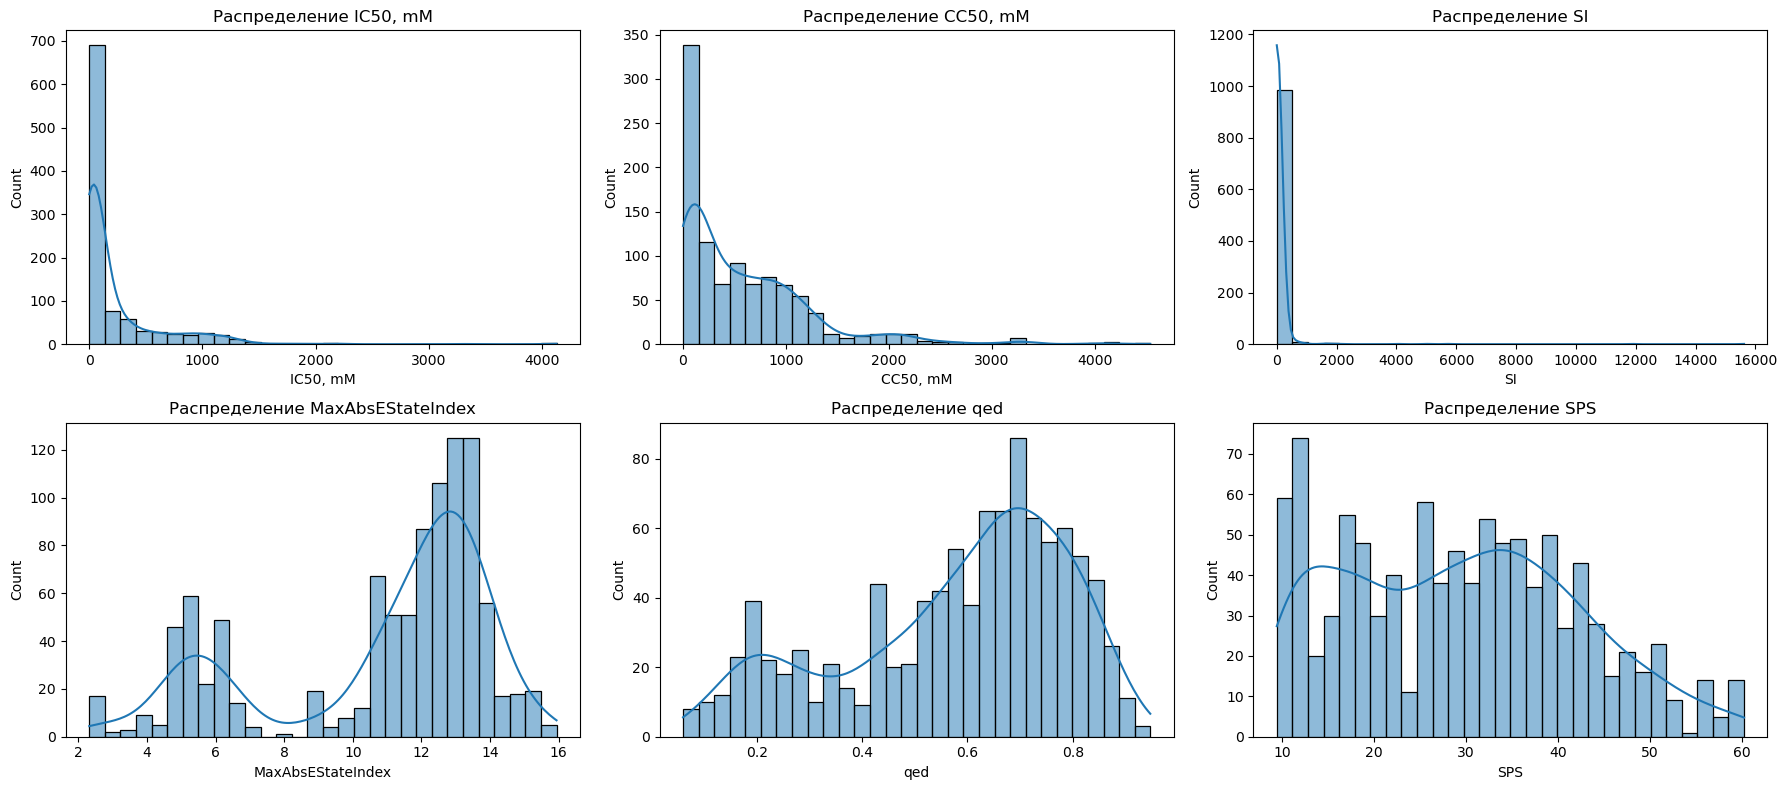


Корреляция целевых переменных:
                   IC50, mM  CC50, mM        SI  MaxAbsEStateIndex       qed  \
IC50, mM           1.000000  0.521346 -0.056604           0.115239  0.099990   
CC50, mM           0.521346  1.000000 -0.006818          -0.099244  0.106065   
SI                -0.056604 -0.006818  1.000000           0.005866  0.040661   
MaxAbsEStateIndex  0.115239 -0.099244  0.005866           1.000000 -0.171035   
qed                0.099990  0.106065  0.040661          -0.171035  1.000000   
SPS               -0.081246  0.108977 -0.004658          -0.422279  0.252016   

                        SPS  
IC50, mM          -0.081246  
CC50, mM           0.108977  
SI                -0.004658  
MaxAbsEStateIndex -0.422279  
qed                0.252016  
SPS                1.000000  


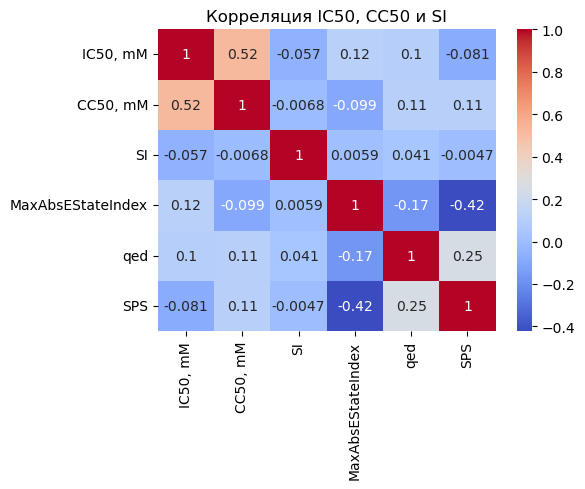

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Распределения целевых переменных
target_cols = ['IC50, mM', 'CC50, mM', 'SI','MaxAbsEStateIndex', 'qed', 'SPS']
plt.figure(figsize=(18, 8))
for i, col in enumerate(target_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Распределение {col}")
plt.tight_layout()
plt.show() 

# Корреляция целевых переменных
corr_targets = df[target_cols].corr()
print("\nКорреляция целевых переменных:")
print(corr_targets)

# Визуализация корреляционной матрицы
plt.figure(figsize=(6, 5))
sns.heatmap(corr_targets, annot=True, cmap="coolwarm")
plt.title("Корреляция IC50, CC50 и SI")
plt.tight_layout()
plt.show() 

#  Анализ данных 

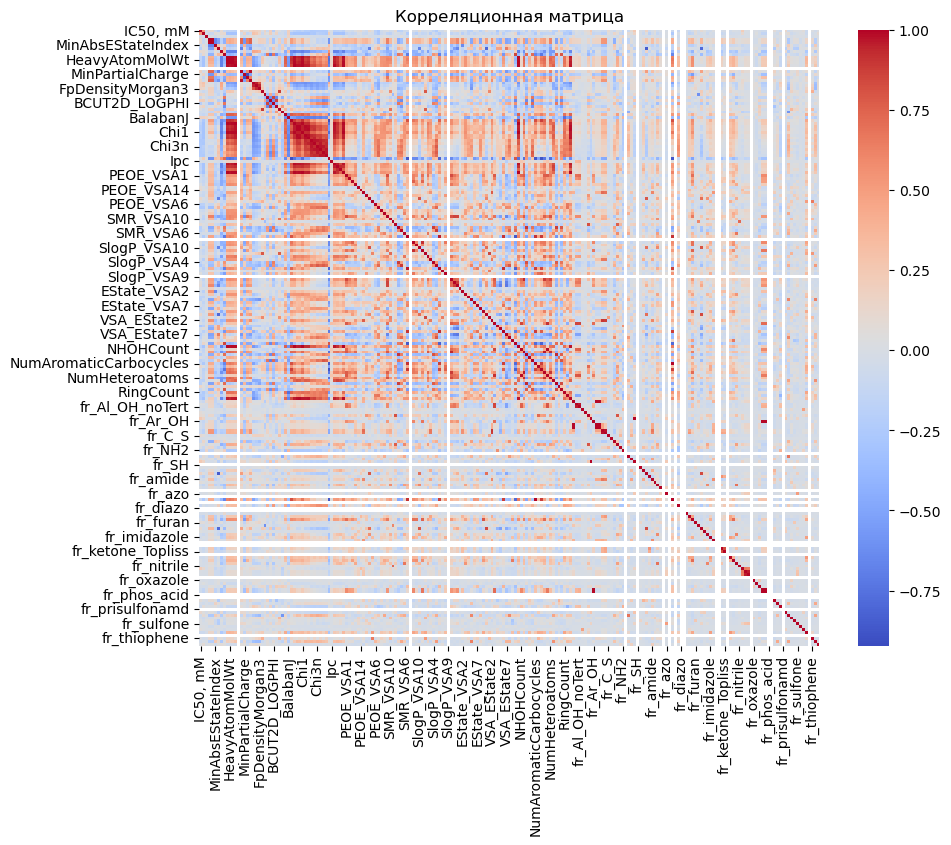


Корреляции с IC50, mM:
 IC50, mM           1.000000
CC50, mM           0.521346
fr_Ar_NH           0.245511
fr_Nhpyrrole       0.245511
fr_nitro           0.215948
                     ...   
fr_nitroso              NaN
fr_phos_acid            NaN
fr_phos_ester           NaN
fr_prisulfonamd         NaN
fr_thiocyan             NaN
Name: IC50, mM, Length: 213, dtype: float64


In [83]:
#Генерируеьм корреляционную матрицу всех числовых признаков

import seaborn as sns
import numpy as np

# Выбираем только числовые колонки
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Целевая переменная
target = 'IC50, mM'

# Корреляционная матрица
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), cmap='coolwarm', annot=False)
plt.title('Корреляционная матрица')
plt.show()

# Корреляции с целевой переменной
if target in numerical_cols:
    corr_with_target = df[numerical_cols].corr()[target].sort_values(ascending=False)
    print(f"\nКорреляции с {target}:\n", corr_with_target)

    # Диаграммы рассеяния
    other_features = [col for col in numerical_cols if col != target]
    plt.figure(figsize=(16, len(other_features) * 2))

    for i, col in enumerate(other_features):
        plt.subplot(len(other_features), 1, i + 1)
        plt.scatter(df[col], df[target], alpha=0.5)
        plt.xlabel(col)
        plt.ylabel(target)
        plt.title(f'{col} vs {target}')

    plt.tight_layout()
    plt.show()



### Данные IC50, mM
имеют широкий диапазон значений (от 0 до ~1000), но основная масса сосредоточена в области низких концентраций (пик в начале графика).

Возможны выбросы в области высоких значений (правая часть графика).

### MaxAbsEStateIndex:

Отрицательная корреляция с SPS (-0.42) — возможно, эти признаки дублируют информацию.

Слабая связь с целевыми переменными, но может быть полезна в комбинации с другими признаками.

qed и SPS:

Умеренная корреляция между собой (0.25), но слабая с IC50/CC50.

Проблемы:

Низкая объясняющая способность отдельных признаков.

### Распределение IC50
Гистограмма (предполагаемый вид по описанию):

Данные IC50, mM имеют широкий диапазон значений (от 0 до ~1000), но основная масса сосредоточена в области низких концентраций (пик в начале графика).

Возможны выбросы в области высоких значений (правая часть графика).
                                             
### Корреляция целевых переменных
Корреляционная матрица показывает взаимосвязь между ключевыми параметрами:

IC50, mM и CC50, mM имеют умеренную положительную корреляцию (0.52), что означает, что с ростом IC50 обычно растёт и CC50.

SI (индекс селективности) слабо коррелирует с IC50 и CC50 (коэффициенты -0.057 и -0.0068), что указывает на его независимость от этих параметров.

MaxAbsEStateIndex демонстрирует слабую связь с IC50 (0.12) и отрицательную с CC50 (-0.099).

qed (квантовая эффективность) слабо коррелирует с IC50 и CC50 (~0.1), но сильнее с SPS (0.25).

SPS (степень насыщенности) имеет слабую отрицательную корреляцию с IC50 (-0.08) и положительную с CC50 (0.11).


CC50 и IC50 связаны, но SI практически не зависит от них.

Химические дескрипторы (например, MaxAbsEStateIndex, qed) слабо влияют на целевые переменные, что может потребовать включения большего числа признаков в модели.

## Важность признаков для IC50

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\NikLeo\AppData\Local\Temp\ipykernel_2792\161108230.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


R²: 0.418
RMSE: 440.560

Топ-10 наиболее важных дескрипторов для IC50:
VSA_EState4         0.062927
Chi1n               0.041380
Chi4v               0.040615
FpDensityMorgan3    0.040201
Chi2v               0.036103
BCUT2D_MRLOW        0.035077
Chi2n               0.023868
SlogP_VSA5          0.021130
BCUT2D_MWLOW        0.020152
Chi3n               0.019954
dtype: float64


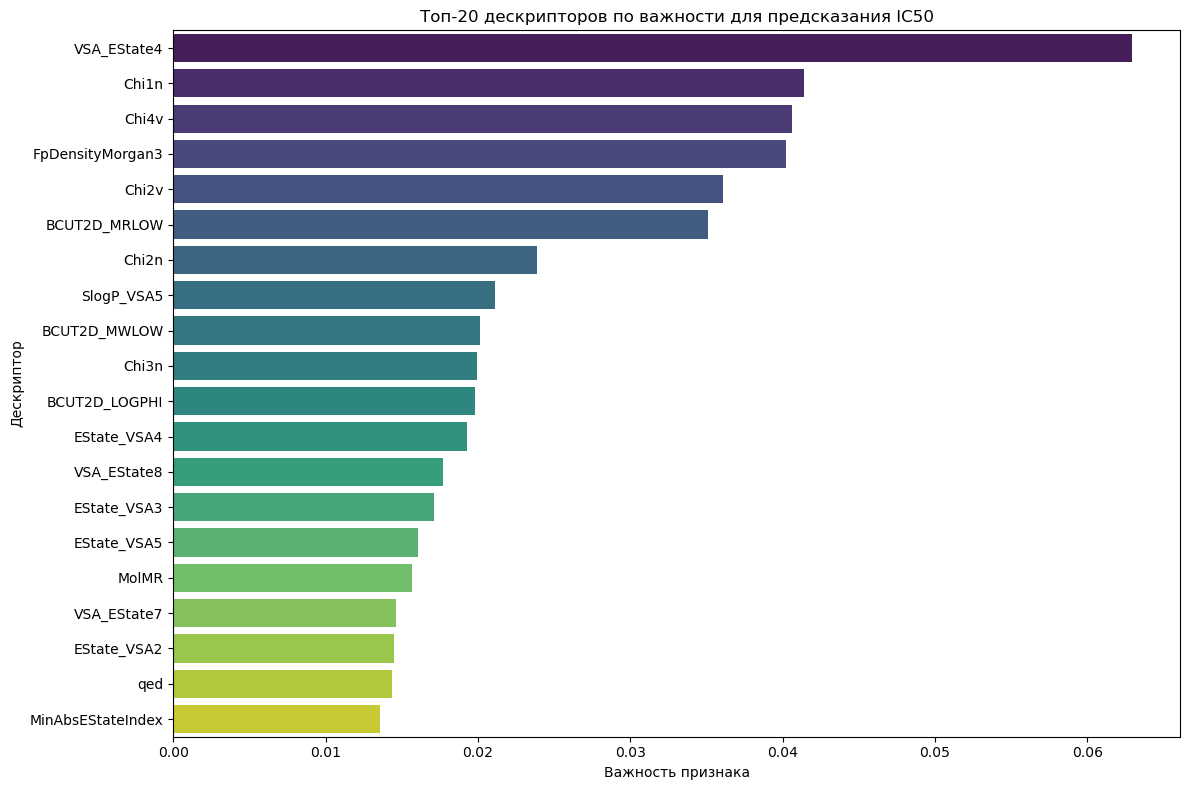

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Целевая переменная
target_variable = 'IC50, mM'

# Удаляем целевую и связанные переменные
X = df.drop([target_variable, 'CC50, mM', 'SI'], axis=1)
y = df[target_variable]


# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Обучение модели
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Предсказание и метрики
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")

# Важность признаков
feature_importances = pd.Series(
    model.feature_importances_, index=X.columns
).sort_values(ascending=False)

print("\nТоп-10 наиболее важных дескрипторов для IC50:")
print(feature_importances.head(10))

# Визуализация 
top_n = 20
plt.figure(figsize=(12, 8))
sns.barplot(
    x=feature_importances.head(top_n),
    y=feature_importances.head(top_n).index,
    palette='viridis'
)
plt.title(f'Tоп-{top_n} дескрипторов по важности для предсказания IC50')
plt.xlabel('Важность признака')
plt.ylabel('Дескриптор')
plt.tight_layout()
plt.show()

## Важность признаков для CC50

Топ-10 наиболее важных дескрипторов для CC50:
LabuteASA           0.058390
BCUT2D_MWLOW        0.043856
Chi1                0.038967
Kappa3              0.037589
Kappa2              0.037464
FpDensityMorgan1    0.035017
BCUT2D_MRLOW        0.029808
MolMR               0.028510
Ipc                 0.022903
FpDensityMorgan2    0.022311
dtype: float64


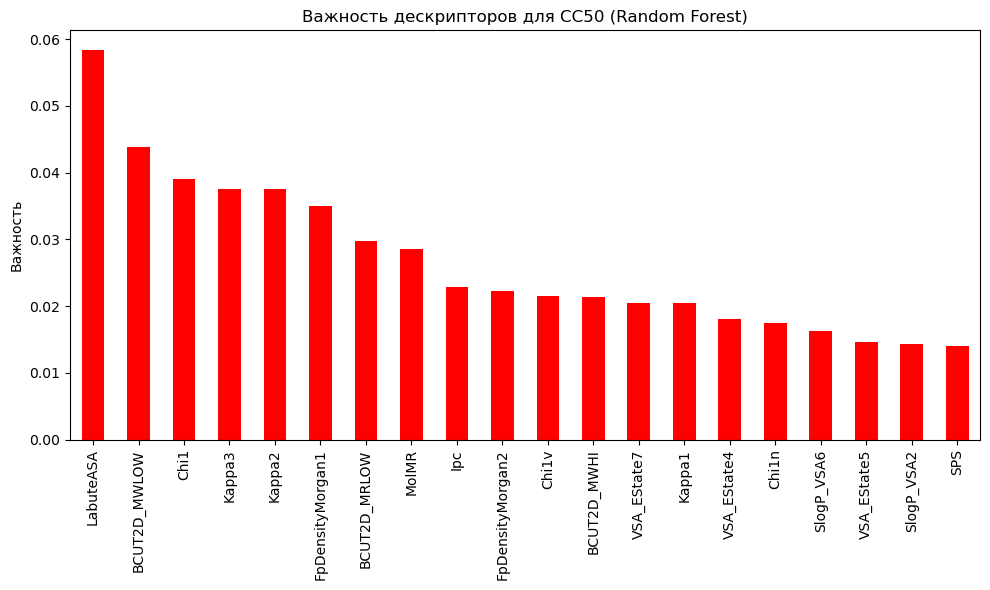

In [56]:
from sklearn.model_selection import  cross_val_predict, KFold
from sklearn.inspection import permutation_importance
# Константы для удобства
TARGET_CC50 = 'CC50, mM'
DROP_COLS = [TARGET_CC50, 'IC50, mM', 'SI']
TOP_FEATURES = 10
PLOT_FEATURES = 20

# Подготовка данных
X_cc50 = df.drop(DROP_COLS, axis=1)
y_cc50 = df[TARGET_CC50]

# Разделение данных
X_train_cc50, X_test_cc50, y_train_cc50, y_test_cc50 = train_test_split(
    X_cc50, y_cc50, test_size=0.2, random_state=42
)

# Обучение модели
model_cc50 = RandomForestRegressor(n_estimators=100, random_state=42)
model_cc50.fit(X_train_cc50, y_train_cc50)

# Анализ важности признаков
feature_importances_cc50 = (
    pd.Series(model_cc50.feature_importances_, index=X_cc50.columns)
    .sort_values(ascending=False)
)

# Вывод результатов
print(f"Топ-{TOP_FEATURES} наиболее важных дескрипторов для CC50:")
print(feature_importances_cc50.head(TOP_FEATURES))

# Визуализация
plt.figure(figsize=(10, 6))
feature_importances_cc50.head(PLOT_FEATURES).plot(kind='bar', color='red')
plt.title('Важность дескрипторов для CC50 (Random Forest)')
plt.ylabel('Важность')
plt.tight_layout()  
plt.show()

### Важность признаков для SI

Топ-10 наиболее важных дескрипторов для SI:
VSA_EState6            0.436771
VSA_EState2            0.073177
MinPartialCharge       0.046888
BalabanJ               0.039939
qed                    0.036372
MaxAbsPartialCharge    0.035627
VSA_EState8            0.015990
VSA_EState9            0.013150
BCUT2D_MRLOW           0.010328
FpDensityMorgan1       0.009884
dtype: float64


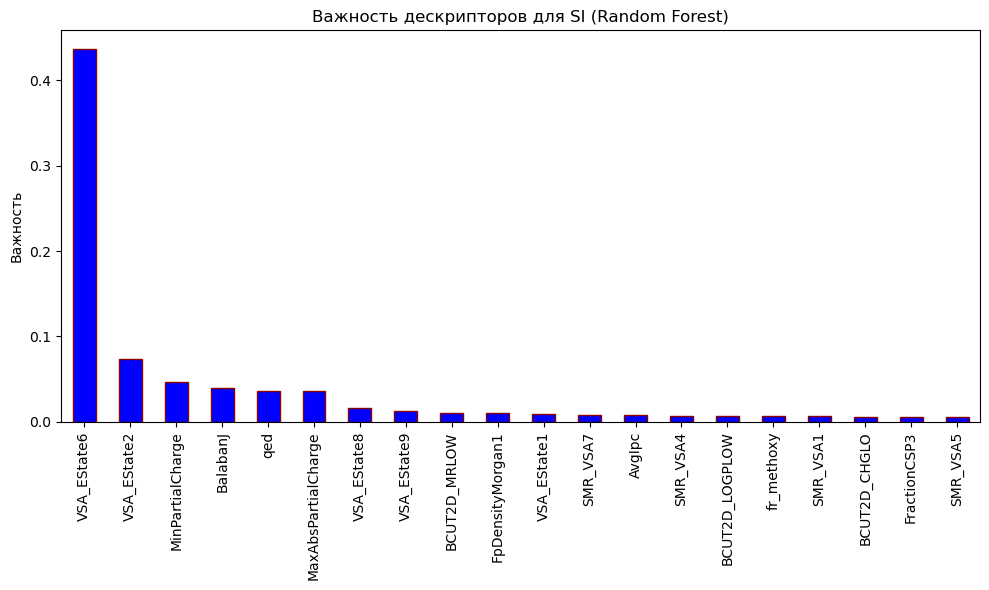

In [58]:
# Константы для удобства
TARGET_SI = 'SI'
DROP_COLS_SI = [TARGET_SI, 'IC50, mM', 'CC50, mM']
TOP_FEATURES = 10
PLOT_FEATURES = 20
BAR_COLOR = 'blue'  

# Подготовка данных
X_si = df.drop(DROP_COLS_SI, axis=1)
y_si = df[TARGET_SI]

# Разделение данных
X_train_si, X_test_si, y_train_si, y_test_si = train_test_split(
    X_si, y_si, 
    test_size=0.2, 
    random_state=42
)

# Обучение модели
model_si = RandomForestRegressor(n_estimators=100, random_state=42)
model_si.fit(X_train_si, y_train_si)

# Анализ важности признаков
feature_importances_si = (
    pd.Series(model_si.feature_importances_, index=X_si.columns)
    .sort_values(ascending=False)
)

# Вывод результатов
print(f"Топ-{TOP_FEATURES} наиболее важных дескрипторов для {TARGET_SI}:")
print(feature_importances_si.head(TOP_FEATURES))

# Визуализация
plt.figure(figsize=(10, 6))
feature_importances_si.head(PLOT_FEATURES).plot(
    kind='bar', 
    color=BAR_COLOR,
    edgecolor='darkred'  
)
plt.title(f'Важность дескрипторов для {TARGET_SI} (Random Forest)')
plt.ylabel('Важность')
plt.tight_layout()  
plt.show()

### Добавим новые признаки для лучшей работы модели

In [60]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

def create_engineered_features(df):
    """Создает новые признаки на основе исходного DataFrame."""
    df_engineered = df.copy()
    new_features = []
    
    # 1. Логарифмирование
    log_cols = ['IC50, mM', 'CC50, mM', 'SI']
    for col in log_cols:
        if col in df_engineered.columns:
            if (df_engineered[col] > 0).all():
                new_col = f'Log_{col}'
                df_engineered[new_col] = np.log10(df_engineered[col])
                new_features.append(new_col)
            
    
    # 2. Взаимодействие признаков
    interaction_pairs = [
        ('MolLogP', 'MolWt', 'MolLogP_x_MolWt'),
        # Можно добавить другие комбинации
    ]
    
    for col1, col2, new_name in interaction_pairs:
        if col1 in df_engineered.columns and col2 in df_engineered.columns:
            df_engineered[new_name] = df_engineered[col1] * df_engineered[col2]
            new_features.append(new_name)
    
    # 3. Полиномиальные признаки
    polynomial_features_cols = ['MolLogP', 'MolWt']
    existing_poly_cols = [col for col in polynomial_features_cols if col in df_engineered.columns]
    
    if existing_poly_cols:
        poly = PolynomialFeatures(degree=2, include_bias=False)
        poly_features = poly.fit_transform(df_engineered[existing_poly_cols])
        poly_feature_names = poly.get_feature_names_out(existing_poly_cols)
        
        new_poly_df = pd.DataFrame(poly_features, columns=poly_feature_names, index=df_engineered.index)
        for col in new_poly_df.columns:
            if col not in df_engineered.columns:
                df_engineered[col] = new_poly_df[col]
                new_features.append(col)
    
    # 4. Бинарные признаки на основе порогов
    threshold_features = [
        ('MolLogP', 3, 'MolLogP_gt_3'),
        # Можно добавить другие пороговые признаки
    ]
    
    for col, threshold, new_name in threshold_features:
        if col in df_engineered.columns:
            df_engineered[new_name] = (df_engineered[col] > threshold).astype(int)
            new_features.append(new_name)
    
    # Вывод информации о новых признаках
    print(f"Создано {len(new_features)} новых признаков:")
    print("\n".join(f"- {feat}" for feat in new_features))
    
    return df_engineered

# Применение функции
df_engineered = create_engineered_features(df)

Создано 8 новых признаков:
- Log_IC50, mM
- Log_CC50, mM
- Log_SI
- MolLogP_x_MolWt
- MolLogP^2
- MolLogP MolWt
- MolWt^2
- MolLogP_gt_3


### Анализ после добавления новых признаков 

Топ-10 наиболее важных дескрипторов для IC50, mM (с новыми признаками):
VSA_EState4         0.049156
MolLogP^2           0.042517
Chi1n               0.040382
Chi4v               0.036636
FpDensityMorgan3    0.035601
BCUT2D_MRLOW        0.035141
Chi2v               0.033789
Chi2n               0.020766
SlogP_VSA5          0.020148
BCUT2D_MWLOW        0.019221
dtype: float64


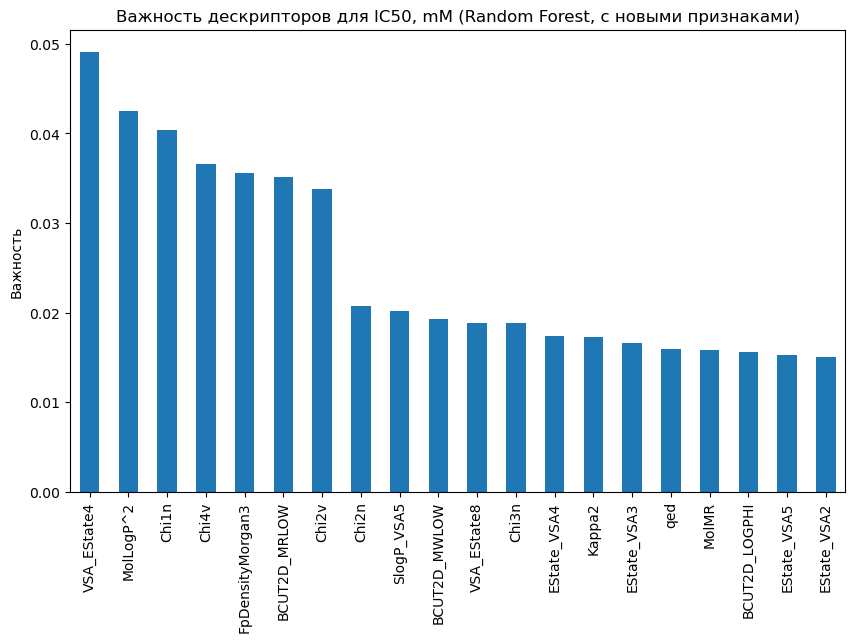

In [61]:
target_variable = 'IC50, mM'
# Исключаем целевую переменную и связанные с ней из признаков
# Также исключаем исходные IC50, CC50, SI, если они присутствуют
cols_to_drop = [target_variable, 'IC50, mM', 'CC50, mM', 'SI', 'Log_IC50, mM', 'Log_CC50, mM', 'Log_SI']
cols_to_drop_existing = [col for col in cols_to_drop if col in df_engineered.columns]

X = df_engineered.drop(cols_to_drop_existing, axis=1)
y = df_engineered[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Топ-10 наиболее важных дескрипторов для IC50, mM (с новыми признаками):")
print(feature_importances.head(10))

plt.figure(figsize=(10, 6))
feature_importances.head(20).plot(kind='bar')
plt.title('Важность дескрипторов для IC50, mM (Random Forest, с новыми признаками)')
plt.ylabel('Важность')
plt.show()

Топ-10 наиболее важных дескрипторов для Log_IC50 (с новыми признаками):
VSA_EState8     0.134035
VSA_EState6     0.111563
VSA_EState4     0.035757
Chi3n           0.023502
AvgIpc          0.021667
qed             0.020004
BCUT2D_MRLOW    0.015881
BalabanJ        0.015837
fr_bicyclic     0.015734
PEOE_VSA1       0.015176
dtype: float64


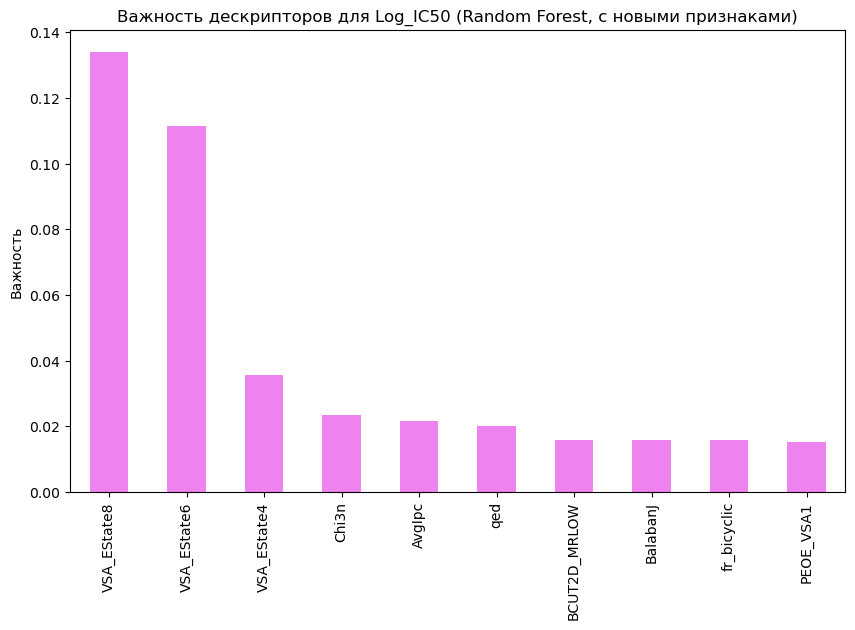

In [68]:
target_variable = 'Log_IC50, mM'
# Исключаем целевую переменную и связанные с ней из признаков
# Также исключаем исходные IC50, CC50, SI, если они присутствуют
cols_to_drop = [target_variable, 'IC50, mM', 'CC50, mM', 'SI', 'Log_IC50, mM', 'Log_CC50, mM', 'Log_SI']
cols_to_drop_existing = [col for col in cols_to_drop if col in df_engineered.columns]

X = df_engineered.drop(cols_to_drop_existing, axis=1)
y = df_engineered[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Топ-10 наиболее важных дескрипторов для Log_IC50 (с новыми признаками):")
print(feature_importances.head(10))

plt.figure(figsize=(10, 6))
feature_importances.head(10).plot(kind='bar', color='violet')
plt.title('Важность дескрипторов для Log_IC50 (Random Forest, с новыми признаками)')
plt.ylabel('Важность')
plt.show()

Результат улучшился

Топ-10 наиболее важных дескрипторов для Log_CC50 (с новыми признаками):
BCUT2D_MWLOW    0.064586
VSA_EState6     0.043626
NHOHCount       0.037661
Kappa1          0.035875
VSA_EState8     0.031190
PEOE_VSA6       0.025779
Kappa3          0.023224
PEOE_VSA7       0.022431
BCUT2D_MRLOW    0.021710
VSA_EState4     0.017500
dtype: float64


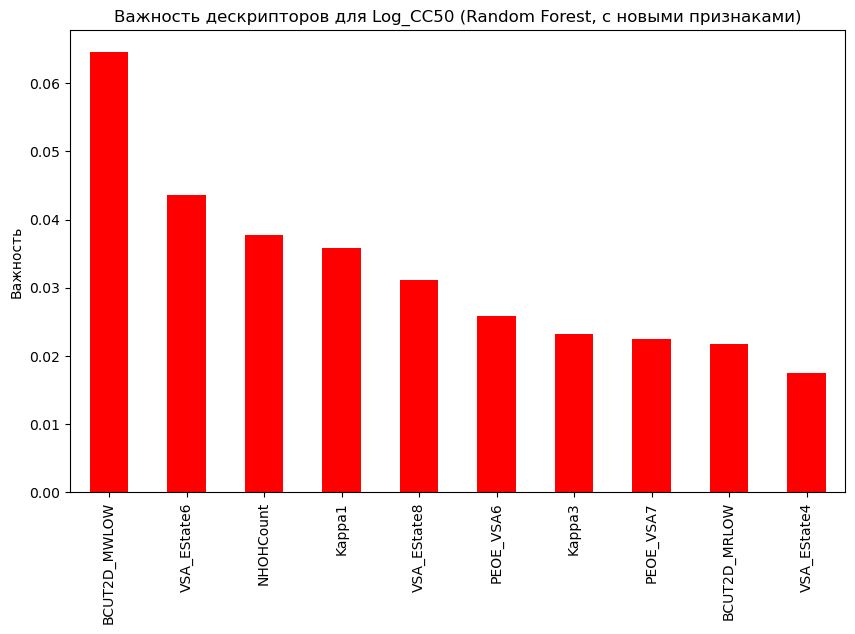

In [69]:
target_variable = 'Log_CC50, mM'
# Исключаем целевую переменную и связанные с ней из признаков
# Также исключаем исходные IC50, CC50, SI, если они присутствуют
cols_to_drop = [target_variable, 'IC50, mM', 'CC50, mM', 'SI', 'Log_IC50, mM', 'Log_CC50, mM', 'Log_SI']
cols_to_drop_existing = [col for col in cols_to_drop if col in df_engineered.columns]

X = df_engineered.drop(cols_to_drop_existing, axis=1)
y = df_engineered[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Топ-10 наиболее важных дескрипторов для Log_CC50 (с новыми признаками):")
print(feature_importances.head(10))

plt.figure(figsize=(10, 6))
feature_importances.head(10).plot(kind='bar', color='red')
plt.title('Важность дескрипторов для Log_CC50 (Random Forest, с новыми признаками)')
plt.ylabel('Важность')
plt.show()

Результат не изменился

Топ-10 наиболее важных дескрипторов для Log_SI (с новыми признаками):
VSA_EState6      0.049598
VSA_EState8      0.043703
BCUT2D_CHGLO     0.033494
SMR_VSA7         0.029403
qed              0.025938
BCUT2D_MWLOW     0.025669
BCUT2D_LOGPHI    0.024633
BCUT2D_MRLOW     0.023006
RingCount        0.018535
BCUT2D_CHGHI     0.017274
dtype: float64


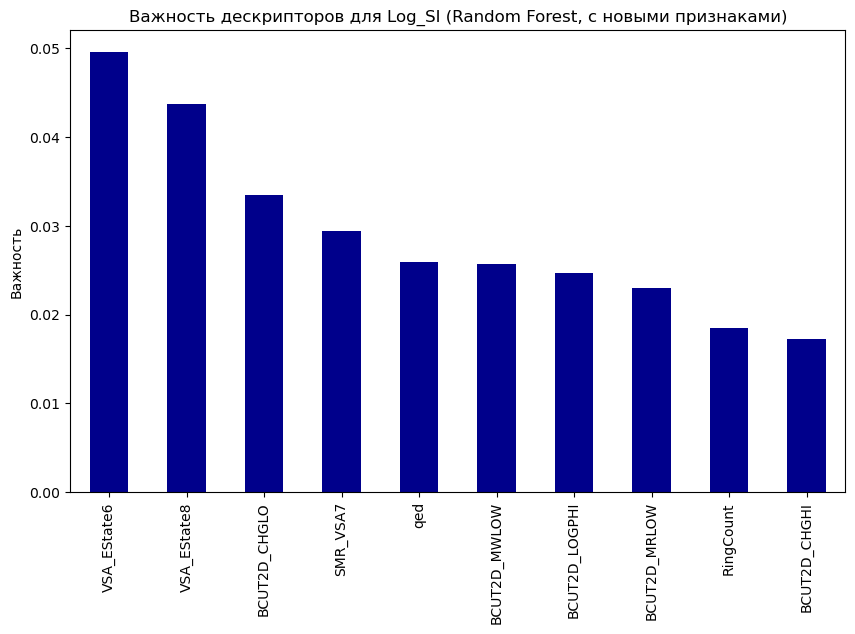

In [70]:
target_variable = 'Log_SI'
# Исключаем целевую переменную и связанные с ней из признаков
# Также исключаем исходные IC50, CC50, SI, если они присутствуют
cols_to_drop = [target_variable, 'IC50, mM', 'CC50, mM', 'SI', 'Log_IC50, mM', 'Log_CC50, mM', 'Log_SI']
cols_to_drop_existing = [col for col in cols_to_drop if col in df_engineered.columns]

X = df_engineered.drop(cols_to_drop_existing, axis=1)
y = df_engineered[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Топ-10 наиболее важных дескрипторов для Log_SI (с новыми признаками):")
print(feature_importances.head(10))

plt.figure(figsize=(10, 6))
feature_importances.head(10).plot(kind='bar', color='darkblue')
plt.title('Важность дескрипторов для Log_SI (Random Forest, с новыми признаками)')
plt.ylabel('Важность')
plt.show()

результат ухудшился

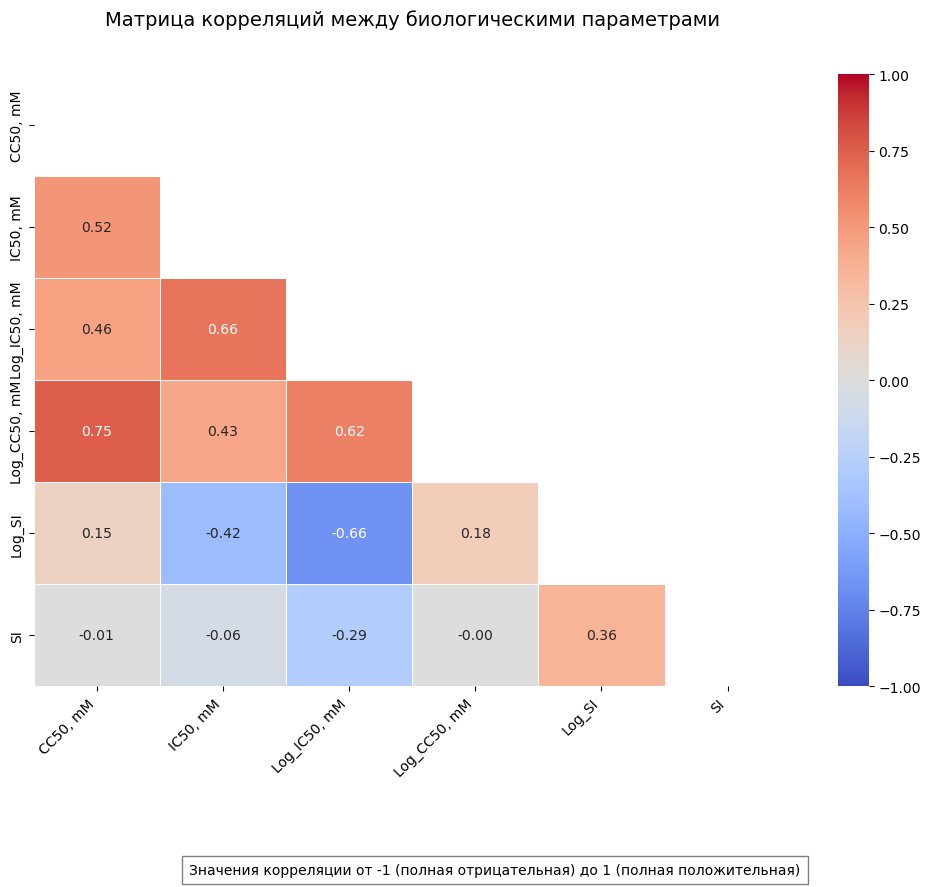

In [71]:
def plot_correlation_matrix(df, target_features):
    """
    Строим корреляционную матрицу для выбранных признаков 

    """
    # Проверяем наличие признаков в данных
    existing_features = [col for col in target_features if col in df.columns]
    
    
    # Вычисляем корреляционную матрицу
    corr_matrix = df[existing_features].corr()
    
    # Настраиваем визуализацию
    plt.figure(figsize=(10, 8))
    
    # Маска для скрытия верхнего треугольника (опционально)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Создаем heatmap
    sns.heatmap(
        corr_matrix,
        mask=mask,
        annot=True,
        cmap='coolwarm',
        fmt=".2f",
        linewidths=0.5,
        center=0,
        vmin=-1,
        vmax=1,
        annot_kws={"size": 10}
    )
    
    # Настройки оформления
    plt.title('Матрица корреляций между биологическими параметрами\n', pad=20, fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    
    # Добавляем пояснение
    plt.figtext(
        0.5, -0.1,
        "Значения корреляции от -1 (полная отрицательная) до 1 (полная положительная)",
        ha="center",
        fontsize=10,
        bbox={"facecolor":"white", "alpha":0.5, "pad":5}
    )
    
    plt.tight_layout()
    plt.show()

# Анализируем корреляции
features_to_analyze = [
    'CC50, mM', 'IC50, mM', 'Log_IC50, mM', 
    'Log_CC50, mM', 'Log_SI', 'SI'
]

plot_correlation_matrix(df_engineered, features_to_analyze)

Высокая кореляция log_IC50 u log_IC50, IC50 u CC50

## Важность дескрипторов для IC50 (Random Forest, с новыми признаками)

Топ-10 наиболее важных дескрипторов для IC50 (с новыми признаками):
SI                  0.412020
VSA_EState4         0.045347
PEOE_VSA7           0.035145
MolMR               0.023684
FpDensityMorgan3    0.022704
Chi4n               0.019624
Chi1n               0.019446
MolLogP^2           0.017405
Kappa2              0.017208
Chi4v               0.013348
dtype: float64


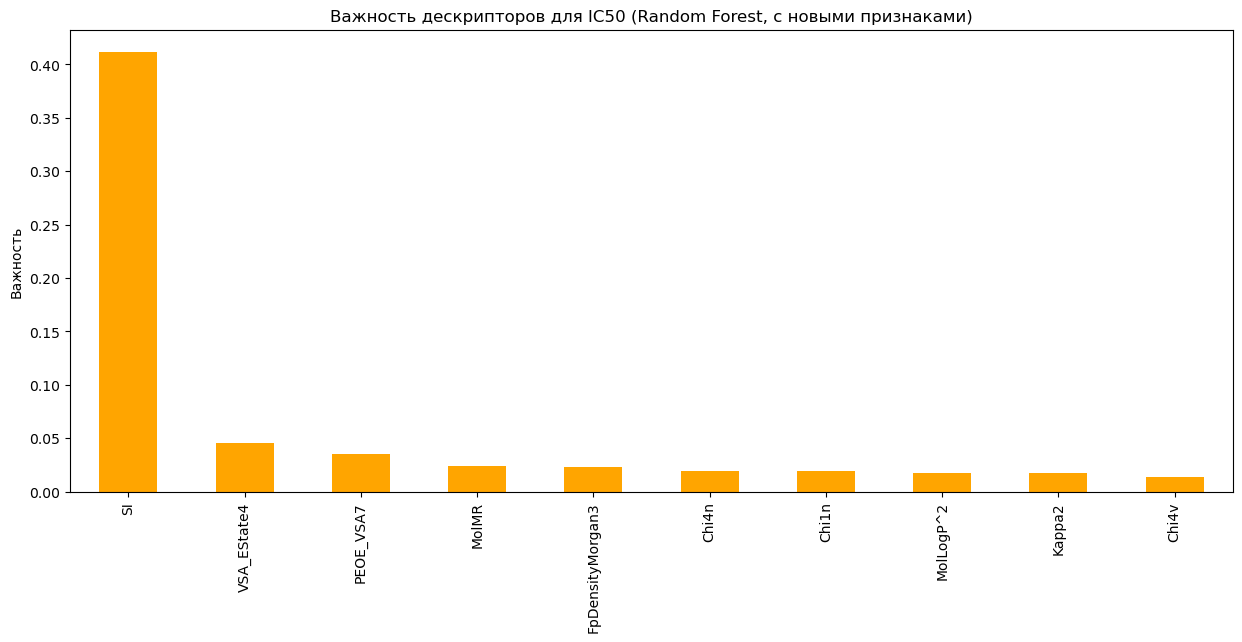

In [72]:
target_variable = 'IC50, mM'
# Исключаем целевую переменную и связанные с ней из признаков
cols_to_drop = [target_variable, 'CC50, mM', 'IC50, mM', 'Log_IC50, mM', 'Log_CC50, mM', 'Log_SI']
cols_to_drop_existing = [col for col in cols_to_drop if col in df_engineered.columns]

X = df_engineered.drop(cols_to_drop_existing, axis=1)
y = df_engineered[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Топ-10 наиболее важных дескрипторов для IC50 (с новыми признаками):")
print(feature_importances.head(10))

plt.figure(figsize=(15, 6))
feature_importances.head(10).plot(kind='bar', color='orange')
plt.title('Важность дескрипторов для IC50 (Random Forest, с новыми признаками)')
plt.ylabel('Важность')
plt.show()

Проверим соотношение с CC50

## Важность дескрипторов для Log_IC50 (Random Forest, с новыми признаками)

Топ-10 наиболее важных дескрипторов для Log_IC50 (с новыми признаками):
SI              0.505703
VSA_EState8     0.021764
BCUT2D_CHGHI    0.018948
VSA_EState4     0.015818
PEOE_VSA6       0.014416
PEOE_VSA7       0.014210
RingCount       0.012066
Kappa3          0.011984
AvgIpc          0.011057
VSA_EState6     0.010501
dtype: float64


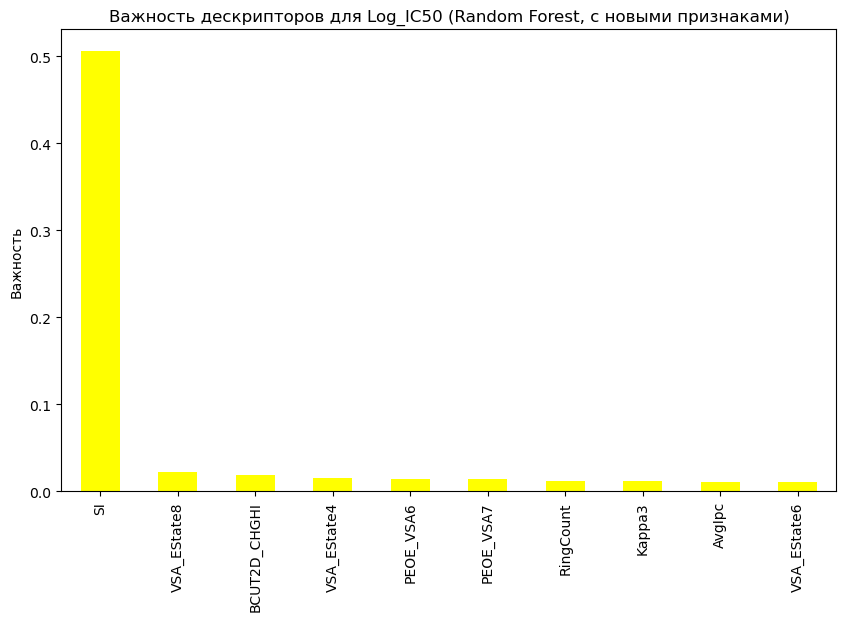

In [73]:
target_variable = 'Log_IC50, mM'
# Исключаем целевую переменную и связанные с ней из признаков
cols_to_drop = [target_variable, 'CC50, mM', 'IC50, mM', 'Log_IC50, mM', 'Log_CC50, mM', 'Log_SI']
cols_to_drop_existing = [col for col in cols_to_drop if col in df_engineered.columns]

X = df_engineered.drop(cols_to_drop_existing, axis=1)
y = df_engineered[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Топ-10 наиболее важных дескрипторов для Log_IC50 (с новыми признаками):")
print(feature_importances.head(10))

plt.figure(figsize=(10, 6))
feature_importances.head(10).plot(kind='bar', color='yellow')
plt.title('Важность дескрипторов для Log_IC50 (Random Forest, с новыми признаками)')
plt.ylabel('Важность')
plt.show()

## Важность дескрипторов для IC50 (Random Forest, с новыми признаками)

Топ-10 наиболее важных дескрипторов для IC50 (с новыми признаками):
SI                  0.121908
LabuteASA           0.054665
Kappa3              0.036168
Kappa2              0.036052
Chi1                0.035685
BCUT2D_MWLOW        0.033974
FpDensityMorgan1    0.029433
VSA_EState4         0.028752
BCUT2D_MRLOW        0.027944
MolMR               0.026172
dtype: float64


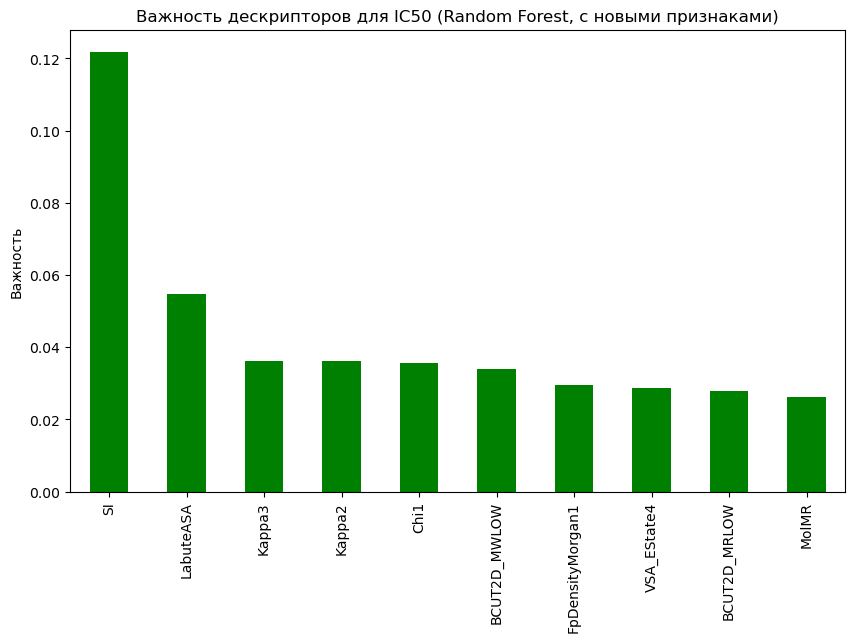

In [74]:
target_variable = 'CC50, mM'
# Исключаем целевую переменную и связанные с ней из признаков
cols_to_drop = [target_variable, 'CC50, mM', 'IC50, mM', 'Log_IC50, mM', 'Log_CC50, mM', 'Log_SI']
cols_to_drop_existing = [col for col in cols_to_drop if col in df_engineered.columns]

X = df_engineered.drop(cols_to_drop_existing, axis=1)
y = df_engineered[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Топ-10 наиболее важных дескрипторов для IC50 (с новыми признаками):")
print(feature_importances.head(10))

plt.figure(figsize=(10, 6))
feature_importances.head(10).plot(kind='bar', color='green')
plt.title('Важность дескрипторов для IC50 (Random Forest, с новыми признаками)')
plt.ylabel('Важность')
plt.show()

## Важность дескрипторов для CC50, mM (Random Forest, с новыми признаками)

Топ-10 наиболее важных дескрипторов для CC50, mM (с новыми признаками):
IC50, mM        0.304379
SI              0.235041
LabuteASA       0.047146
Chi1            0.032260
Ipc             0.030273
Kappa3          0.025468
Kappa2          0.020009
MolMR           0.015436
MolWt           0.013601
BCUT2D_MWLOW    0.010475
dtype: float64


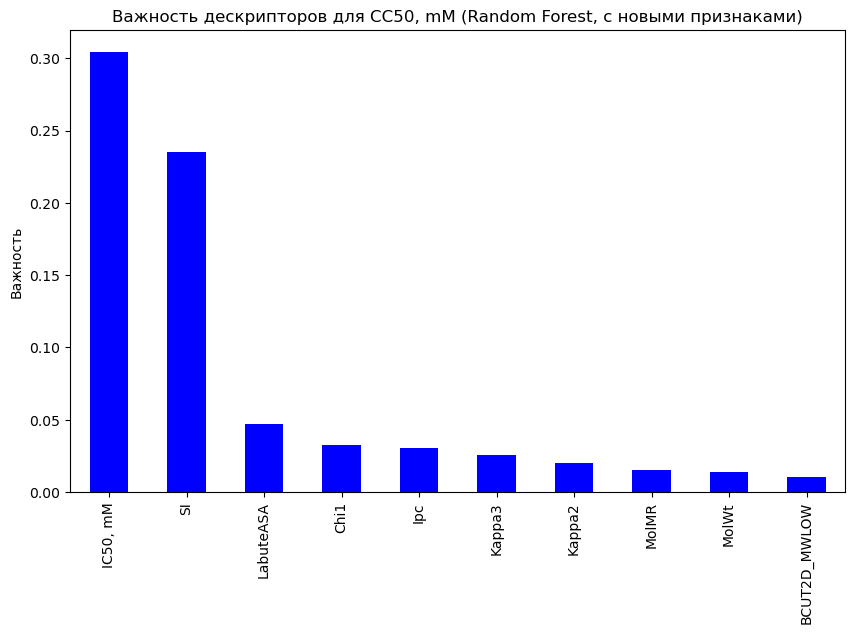

In [75]:
target_variable = 'CC50, mM'
# Исключаем целевую переменную и связанные с ней из признаков
cols_to_drop = [target_variable, 'CC50, mM', 'Log_IC50, mM', 'Log_CC50, mM', 'Log_SI']
cols_to_drop_existing = [col for col in cols_to_drop if col in df_engineered.columns]

X = df_engineered.drop(cols_to_drop_existing, axis=1)
y = df_engineered[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Топ-10 наиболее важных дескрипторов для CC50, mM (с новыми признаками):")
print(feature_importances.head(10))

plt.figure(figsize=(10, 6))
feature_importances.head(10).plot(kind='bar', color='blue')
plt.title('Важность дескрипторов для CC50, mM (Random Forest, с новыми признаками)')
plt.ylabel('Важность')
plt.show()